In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Styling

In [30]:
sns.set_theme() #apply the default theme

## Numerical Plot

* **Distribution**: Histogram(tan suat), KDE(Kernel density Estimate), Displot
* **Bar Plot**
* **Count Plot**
* **Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và các cột
* **Box Plot**: phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* **Join Plot**
* **Pair Plot**
* **Heart map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

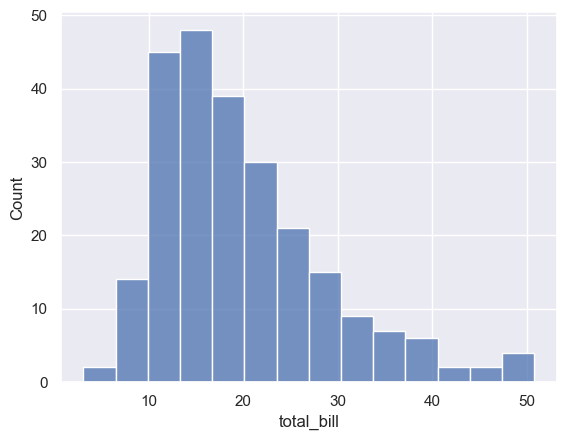

In [31]:
# Distribution plot
tips_df = sns.load_dataset('tips')
tips_df.head()
sns.histplot(data=tips_df['total_bill']);

In [20]:
tips_df["total_bill"].value_counts().sort_values(ascending=False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

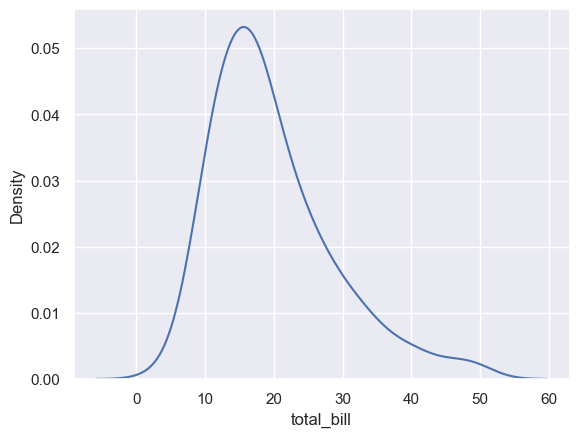

In [32]:
#KDE plot: biểu thị dữ liệu bằng đường cong mật độ xác suất liên tục theo một hoặc nhiều thứ nguên
sns.kdeplot(data=tips_df["total_bill"]);



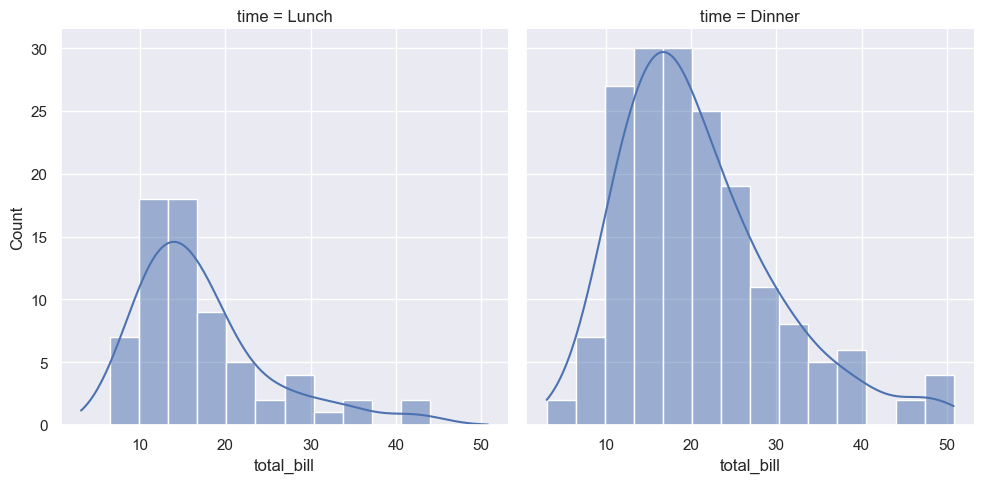

In [33]:
#Displot
sns.displot(data=tips_df, x='total_bill', col='time', kde=True);

## Categorical Plots

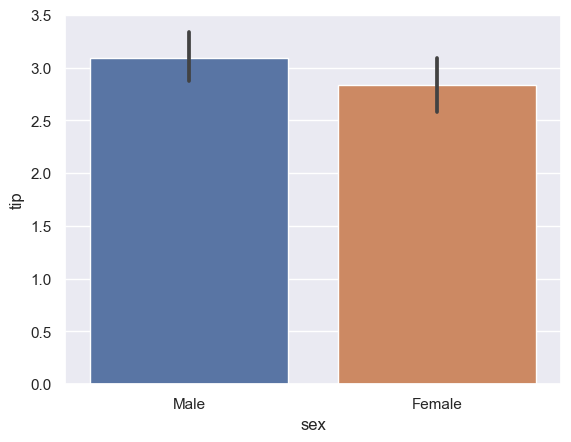

In [35]:
#Bar plots
tips_df.head()
sns.barplot(data=tips_df,x='sex',y='tip',estimator=np.mean);

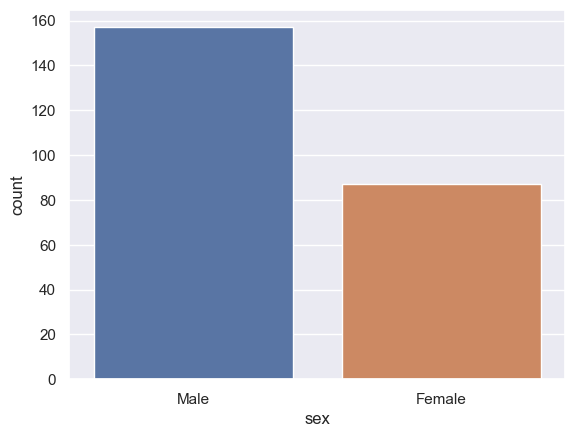

In [37]:
#Count Plot
tips_df['sex'].value_counts()
sns.countplot(data=tips_df,x='sex');

## Box Plot:là một good indication về cách các giá trị trong dữ liệu được phân bổ

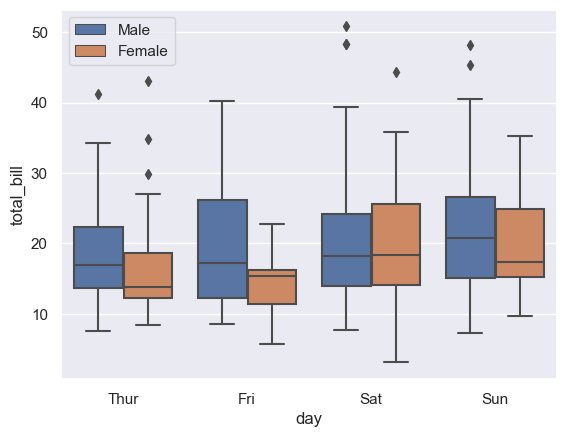

In [42]:
sns.boxplot(data=tips_df, x='day', y='total_bill', hue='sex');
plt.legend(loc=0);#loai bo tu 'sex' o phan mo ta


## Facet Grid
có thể vẽ được 3 chiều: row, col, hue

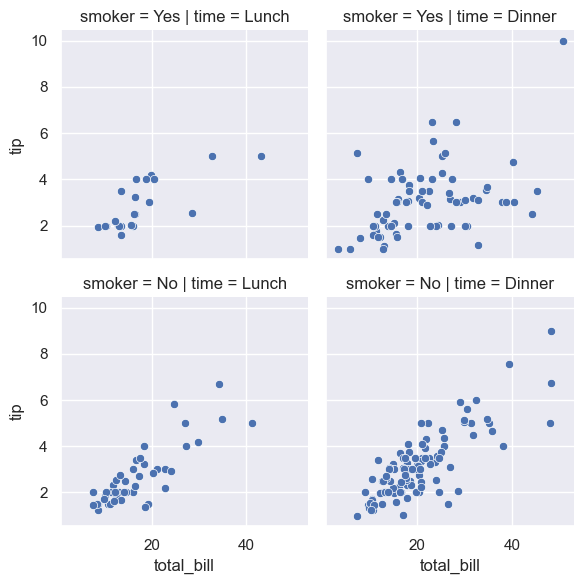

In [47]:
tips_fg = sns.FacetGrid(data=tips_df,row='smoker', col='time')
tips_fg.map(sns.scatterplot, 'total_bill', 'tip');


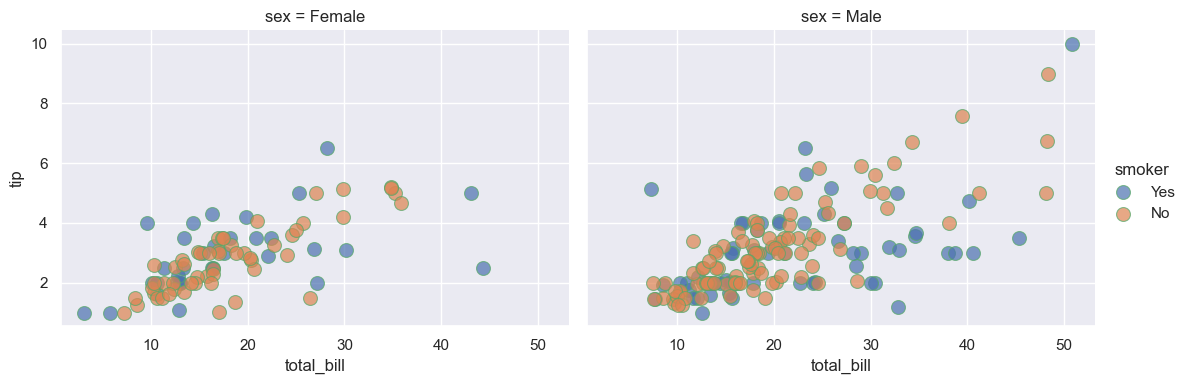

In [64]:
kws=dict(s=100, edgecolor='g', alpha=0.7)
new_fg = sns.FacetGrid(data=tips_df, col='sex',
                        hue='smoker',
                       col_order=['Female', 'Male'],
                        height=4, aspect=1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws);

new_fg.add_legend();

In [67]:
#Join Plot
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


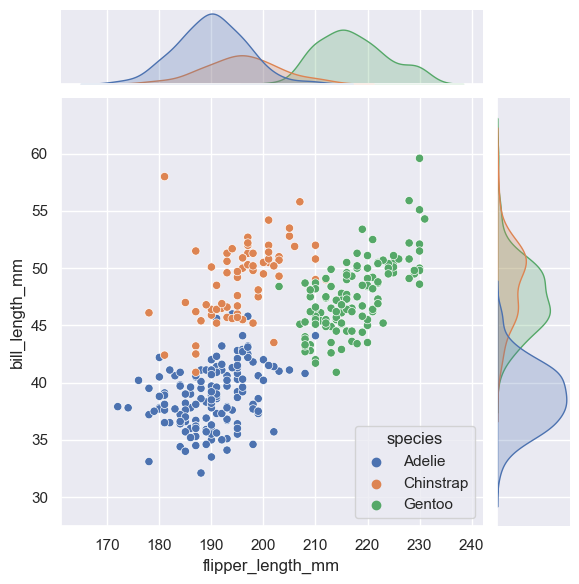

In [70]:
sns.jointplot(data=penguins_df, x='flipper_length_mm', y='bill_length_mm', hue='species');

## Pair Plots

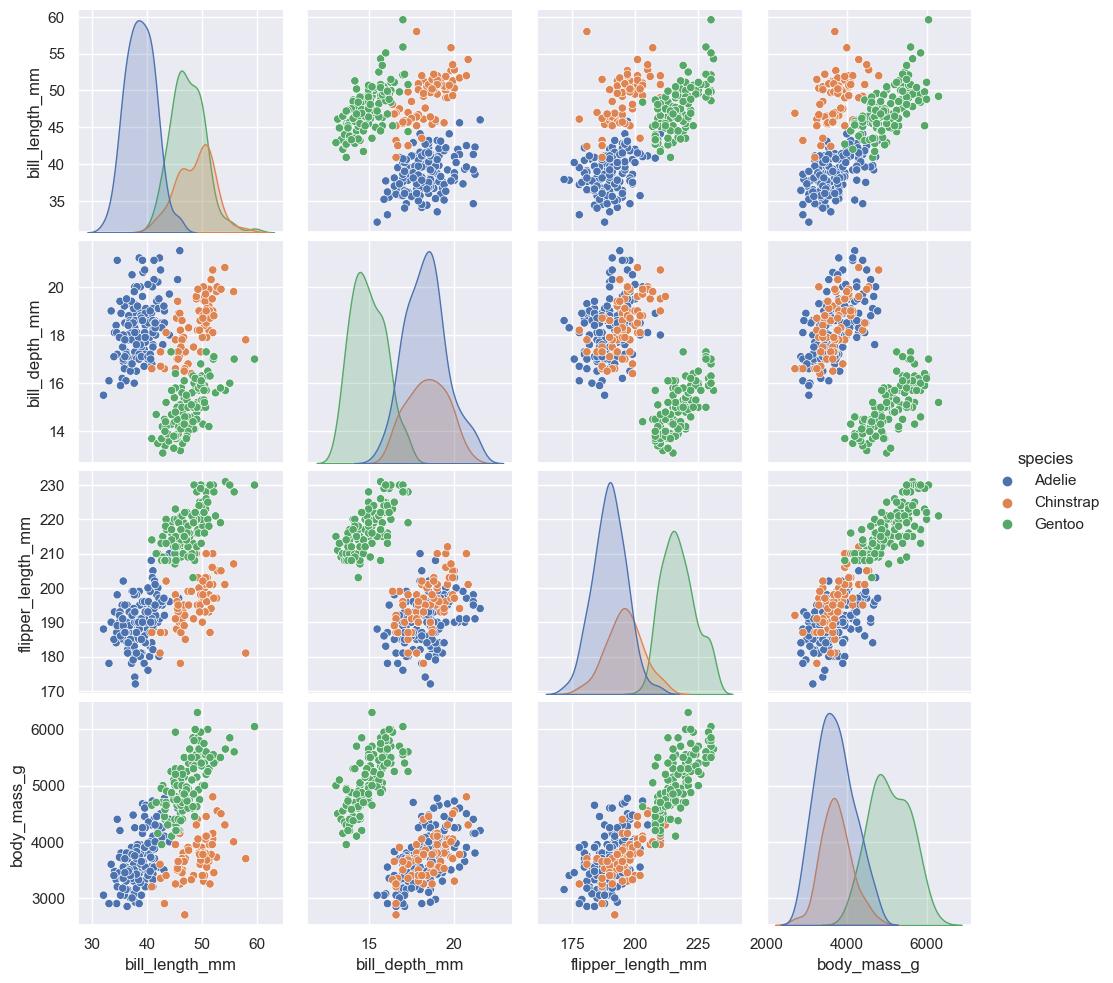

In [72]:
sns.pairplot(data=penguins_df, hue="species");

## Heatmaps
sự tương quan về cường độ của các giá trị

In [75]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [77]:
flights = pd.pivot_table(flights_df, index='month', columns='year')
flights

passengers                                                       
year        1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                  
Jan          112  115  145  171  196  204  242  284  315  340  360  417
Feb          118  126  150  180  196  188  233  277  301  318  342  391
Mar          132  141  178  193  236  235  267  317  356  362  406  419
Apr          129  135  163  181  235  227  269  313  348  348  396  461
May          121  125  172  183  229  234  270  318  355  363  420  472
Jun          135  149  178  218  243  264  315  374  422  435  472  535
Jul          148  170  199  230  264  302  364  413  465  491  548  622
Aug          148  170  199  242  272  293  347  405  467  505  559  606
Sep          136  158  184  209  237  259  312  355  404  404  463  508
Oct          119  133  162  191  211  229  274  306  347  359  407  461
Nov          104  114  146  172  180  203  237  271  305  310  362  390
Dec          118  140  166  194  201  229  278  306  336  337  405  432

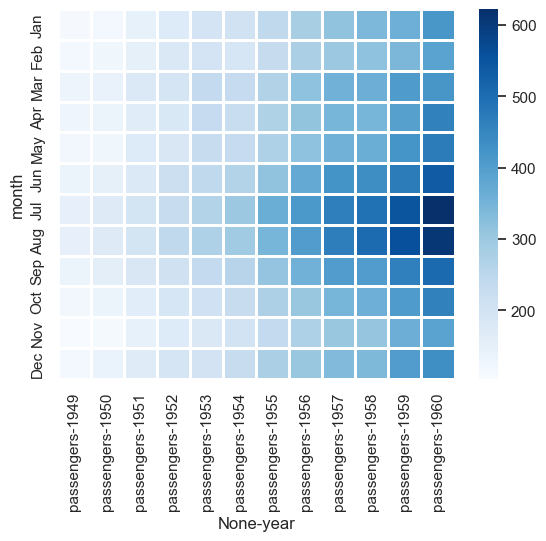

In [84]:
sns.heatmap(flights, cmap='Blues',linewidths=1,
    linecolor='white');

## Project: Nutrition Data in Cereals

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
cereal_df = pd.read_csv('./cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [122]:
#irrelevant fields

fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df_new = cereal_df.drop(fields, axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [135]:
#corr()

cereal_corr = cereal_df_new.corr(numeric_only=True) #Get correlation data
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [143]:
#ones_like can build a matrix of booleans with the same as our data
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr #giong size cua cereal_corr
#np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

<Axes: >

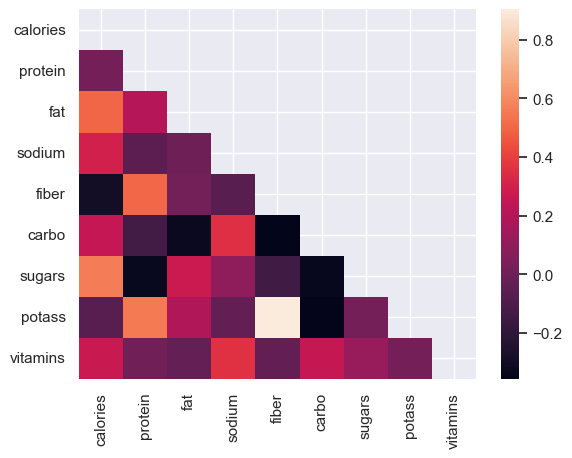

In [140]:
sns.heatmap(data=cereal_corr, mask=mask, )

In [144]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [145]:
adjusted_cereal_corr = cereal_corr.iloc[1: , :-1]

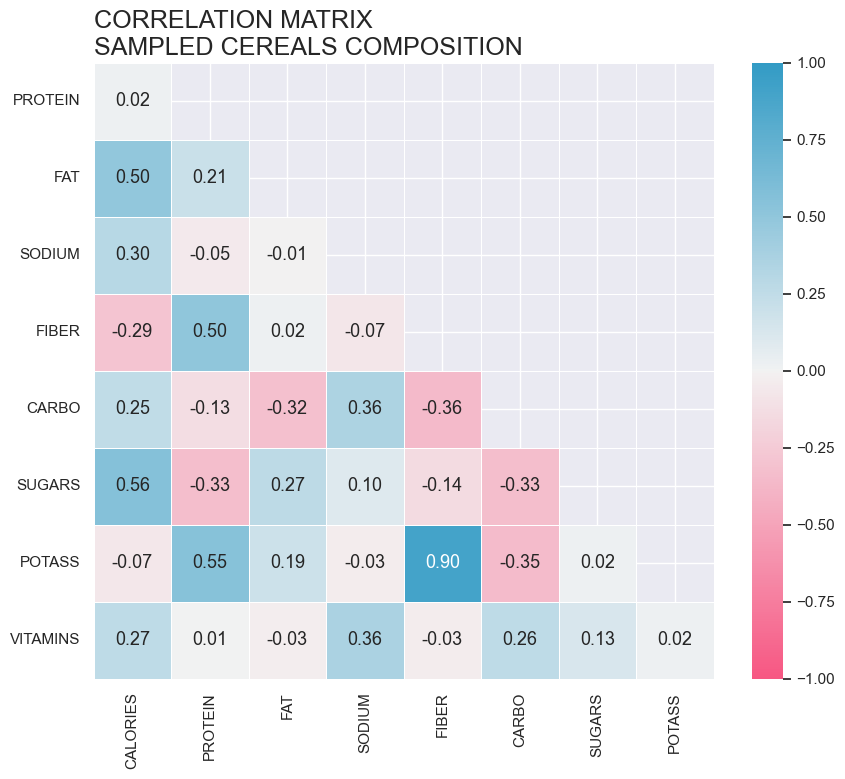

In [167]:
fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(0,230,90,60,as_cmap=True)
sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
           annot=True,annot_kws={"fontsize":13}, fmt='.2f', cmap=cmap,
           vmin=-1, vmax=1, linecolor='white', linewidths=0.5,
           );

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0);
ax.set_xticklabels(xticks, rotation=90);
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION'
ax.set_title(title, loc='left', fontsize=18);